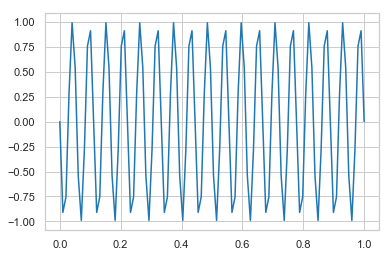

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style()

def sinsig(n, a, f, fs, time=1.0, phi = 0):
    x = np.linspace(0, time, n)
    x = x[:100]
    y = a * np.sin(2 * f * np.pi * n * x + phi)
    return x, y

f, fs, a, n, time = 18000, 48000, 1.0, 100, 0.0025

x, pulse = sinsig(n, a, f, fs)
plt.plot(x, pulse)

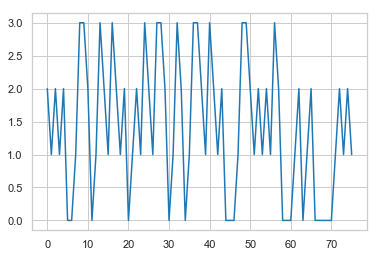

In [50]:
delta = 50
pause = [np.zeros((1, i * delta), dtype=np.float) for i in range(1, 5)]

from binascii import hexlify
my_str = 'Tsinghua University'
def encode(x):
    info = x.encode('ascii')
    info = hexlify(info)
    info = info.decode('ascii')
    info = int(info, 16)
    info = bin(info)
    info = str(info)[2:]
    length = len(info)
    arr = [int(info[i:i+2], 2) for i in range(length // 2)]
    if length & 1 == 1:
        arr.append(int(info[-1], 2))
    arr = np.array(arr)
    return arr
arr = encode(my_str)
plt.plot(arr)

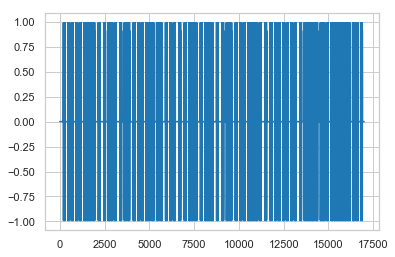

In [51]:
def syth(pulse, arr):
    sig = [np.append(pulse, pause[i]) for i in arr]
    sig = np.concatenate(sig, axis=0)
    sig = np.append(pause[3], sig)
    return sig
sig = syth(pulse, arr)
x = np.linspace(0, 1, len(sig))
plt.plot(sig)

In [52]:
import wave
def writewav(data, filename, fs):
    with wave.open(filename, 'wb') as f:
        f.setnchannels(1)
        f.setsampwidth(2)
        f.setframerate(fs)
        f.writeframes(data.tostring())
        
writewav(sig, 'sample.wav', fs)

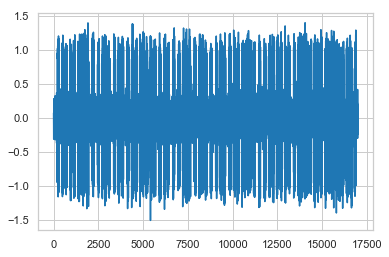

In [55]:
def awgn(x, snr):
    snr = 10**(snr/10.0)
    xpower = np.sum(x**2)/len(x)
    npower = xpower / snr
    return np.random.randn(len(x)) * np.sqrt(npower)

n = awgn(sig, 10)
sign = sig + n
plt.plot(sign)

In [ ]:
import scipy.signal
fsr = 44100
delta = 500
def extract(data, fsr, f):
b, a = signal.butter(N=6, Wn=[2 * (low) / fsr, 2 * high / fsr], type='bandpass', output='ba')